# Introduction
***Notebook in progress.***

This notebook looks at the possibility of getting any given roll with the Left-Center-Right die, which has one face each for left, center, and right, and three faces total for nothing. The probability on a single die is obviously `1:1:1:3` respectively. We will be looking at the probabilities of throwing multiple dice, and how this changes the game.

## Imports

In [1]:
import pandas
import numpy as np
np.random.seed(0)
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dice Probabilities

First we **define the `LCR_die`** so as not to write repetitive code later.

In [2]:
# Define the face of the die

LCR_die = ["L", "C", "R", "O", "O", "O"]

There is a function-wise solution to the coding that follows (which is offered in section 3 of the notebook), but writing it like this is much more readable and clarifies what's actually happening. Here, the relationship is such that **at each level of the for loops we are adding one possible outcome to our previous possible outcome(s), like a branching tree of possibilities,** until all are exhausted. The same holds for all examples herein.

## Three Dice

Here we look at the probabilities that come with **rolling three dice,** which is the **game default.**

In [3]:
# Create a list of lists where each sub-list is a possible roll of three dice

three_dice = []

for i in LCR_die:
    for n in LCR_die:
        for x in LCR_die:
            three_dice.append([i, n, x])

There are **216 ways to roll the dice.**

Admittedly, some of these have the same in-game impact, such as `["L", "C", "R"]` and `["R", "L", "C"]`. We are listing *all such instances* so as to reflect the *likelihood* of their happening. If we were to group all rolls with these three letters and no `"O"`s in them as one, we would miss out on the fact that this identical-impact roll *actually* accounts for **6** possible outcomes of the 216.

In [4]:
# Number of possible outcomes
len(three_dice)

216

### Lose Or Keep All

Interestingly enough, we now see that **losing all** your coins and **not losing any** are equally likely. This could be problematic (in that the game could ebb and flow eternally), were it not for the fact that losing coins to the center pot loses them forever.

In [5]:
# Number of outcomes where you KEEP all your coins
keep_all = [x for x in three_dice if x == ['O', 'O', 'O']]
len(keep_all)

27

In [6]:
# Number of outcomes where you LOSE all your coins
lose_all = [x for x in three_dice if 'O' not in x]
len(lose_all)

27

### Circulating Coins vs. Losing To The Center Pot

The probabilities below show that **the game does *NOT* tend towards decay unless coins must stay in the pot.** They of course must, but this is to say that mathematically it is less likely for coins to enter the pot than it is for them to stay in player circulation.

This is perhaps a game-feel decision. If coins entered the pot too often, the game would feel futile. As it stands, it is **1.37** times as likely for coins to stay out of the pot on any given roll.

In [7]:
# Number of outcomes where NO money enters the pot

none_to_pot = [x for x in three_dice if 'C' not in x]
len(none_to_pot)

125

In [8]:
# Number of outcomes where SOME money enter the pot

some_to_pot = [x for x in three_dice if 'C' in x]
len(some_to_pot)

91

In [9]:
len(none_to_pot)/len(some_to_pot)

1.3736263736263736

## Four Dice

Here we replicate the above findings for a game where instead four dice is the default amount in a throw.

In [10]:
# Create a list of lists where each sub-list is a possible roll of four dice

four_dice = []

for i in LCR_die:
    for n in LCR_die:
        for x in LCR_die:
            for z in LCR_die:
                four_dice.append([i, n, x, z])
                
len(four_dice)

1296

We've sextupled our possible outputs from **216** to **1296.** This pattern of powers-of-six will carry as we continue.

In [11]:
1296/216

6.0

### Lose Or Keep All

The equivalence maintains, but we increase the total number of outcomes by **x3.**

In [12]:
# Number of outcomes where you KEEP all your coins
keep_all_four = [x for x in four_dice if x == ['O', 'O', 'O', 'O']]
len(keep_all_four)

81

In [13]:
# Number of outcomes where you LOSE all your coins
lose_all_four = [x for x in four_dice if 'O' not in x]
len(lose_all_four)

81

### Circulating Coins vs. Losing To The Center Pot

Previously, it was **1.37 times** as likely to keep all coins in player circulation. Now, it's only **0.93 times** as likely, meaning that coins enter the pot more often than the opposite. ***As the number of dice increase, so too does the game's rate of decay.***

In [14]:
# Number of outcomes where NO money enters the pot

none_to_pot_four = [x for x in four_dice if 'C' not in x]
len(none_to_pot_four)

625

In [15]:
# Number of outcomes where SOME money enter the pot

some_to_pot_four = [x for x in four_dice if 'C' in x]
len(some_to_pot_four)

671

In [16]:
len(none_to_pot_four)/len(some_to_pot_four)

0.9314456035767511

# Game Decay At Higher Numbers Of Dice

## Decay Calculator Function

Here we use the `product()` function provided in Itertools to produce Cartesian products, save those, and then use the same list comprehensions as above to find the relationship between coins in-and-out of circulation.

In [17]:
def LCR_decay_calc(num_dice):
    '''
    Function that returns the rate of game-decay for Left Center Right, based
    on number of dice in play.
    ---
    num_dice
        Number of dice in play. Integer.
    '''
    LCR_die = ["L", "C", "R", "O", "O", "O"]
    outputs = list(product(LCR_die, repeat = num_dice))
    
    none_in_pot = len([x for x in outputs if 'C' not in x])
    some_in_pot = len([x for x in outputs if 'C' in x])
    decay_rate = none_in_pot/some_in_pot
    
    return none_in_pot, some_in_pot, decay_rate

In [18]:
# Example of function with three dice, same results as before
LCR_decay_calc(3)

(125, 91, 1.3736263736263736)

## Calculating Rates Of Decay

Now I'm getting the rates of decay for games with up to 10 dice. This is obviously impractical in a physical sense, but mathematically salient.

*Note: If running this code yourself, be mindful that the cell below takes exponentially longer to run with every additional die you add. I ran into memory errors at ten dice and couldn't calculate any higher.*

In [19]:
# Create a dictionary to store rates of decay
decay_dict = {}
for i in range(1, 10):
    decay_dict[i] = LCR_decay_calc(i)

In [20]:
# And the results
decay_dict

{1: (5, 1, 5.0),
 2: (25, 11, 2.272727272727273),
 3: (125, 91, 1.3736263736263736),
 4: (625, 671, 0.9314456035767511),
 5: (3125, 4651, 0.6718985164480756),
 6: (15625, 31031, 0.503528729335181),
 7: (78125, 201811, 0.3871196317346428),
 8: (390625, 1288991, 0.30304711204345103),
 9: (1953125, 8124571, 0.24039730836249693)}

## Visualizing Rates Of Decay

The visualization below shows that increasing the number of dice is inversely proportional to keeping coins in play. In other words, **the more dice you have, the more likely you are to lose coins to the center pot.**

If you *were* to play with more dice, you'd have more coins to start, however. A ten-dice game would start with ten coins, and so on. I will be running game simulations in the notebook `game_simulation.ipynb` to see if the games actually *last* for different times.

In [21]:
# Store the rates of decay in a list
decay_rates = [x[2] for x in decay_dict.values()]

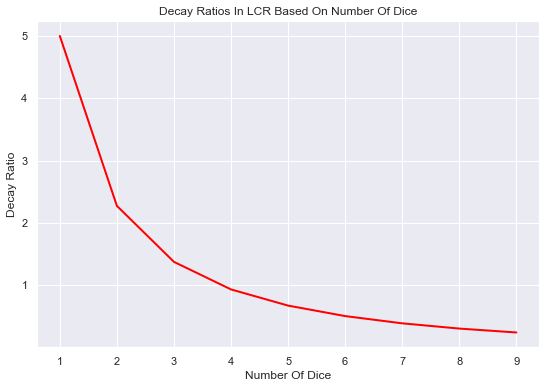

In [35]:
# Plot rates of decay
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize = (9,6))
sns.lineplot(x = range(1,10), y = decay_rates, c = 'red', linewidth = 2)
plt.xlabel("Number Of Dice")
plt.ylabel("Decay Ratio")
plt.title("Decay Ratios In LCR Based On Number Of Dice")
plt.savefig("images/decay_ratios.png");

# Appendix

## Three Dice Throws

These are the 216 possible throws printed out:

In [23]:
three_dice

[['L', 'L', 'L'],
 ['L', 'L', 'C'],
 ['L', 'L', 'R'],
 ['L', 'L', 'O'],
 ['L', 'L', 'O'],
 ['L', 'L', 'O'],
 ['L', 'C', 'L'],
 ['L', 'C', 'C'],
 ['L', 'C', 'R'],
 ['L', 'C', 'O'],
 ['L', 'C', 'O'],
 ['L', 'C', 'O'],
 ['L', 'R', 'L'],
 ['L', 'R', 'C'],
 ['L', 'R', 'R'],
 ['L', 'R', 'O'],
 ['L', 'R', 'O'],
 ['L', 'R', 'O'],
 ['L', 'O', 'L'],
 ['L', 'O', 'C'],
 ['L', 'O', 'R'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['L', 'O', 'L'],
 ['L', 'O', 'C'],
 ['L', 'O', 'R'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['L', 'O', 'L'],
 ['L', 'O', 'C'],
 ['L', 'O', 'R'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['L', 'O', 'O'],
 ['C', 'L', 'L'],
 ['C', 'L', 'C'],
 ['C', 'L', 'R'],
 ['C', 'L', 'O'],
 ['C', 'L', 'O'],
 ['C', 'L', 'O'],
 ['C', 'C', 'L'],
 ['C', 'C', 'C'],
 ['C', 'C', 'R'],
 ['C', 'C', 'O'],
 ['C', 'C', 'O'],
 ['C', 'C', 'O'],
 ['C', 'R', 'L'],
 ['C', 'R', 'C'],
 ['C', 'R', 'R'],
 ['C', 'R', 'O'],
 ['C', 'R', 'O'],
 ['C', 'R', 'O'],
 ['C', 'O', 'L'],
 ['C', 'O'